In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# EDA

In [227]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [228]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [229]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [230]:
# Get an overview of the data
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [231]:
# Check number of null values
print(titanic_df.shape)
titanic_df.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Given that more than 50% of the cabin is null, the column can be dropped 

In [232]:
# Drop cabin column
titanic_df.drop('Cabin', axis=1, inplace=True)

# Drop rows with null ages
titanic_df.dropna(subset=['Age'], inplace=True)

# Impute embarked
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No more null in the dataset and the cabin column has been dropped.

In [233]:
# Checks for duplicate rows
print(titanic_df.duplicated().values.any())
print(titanic_df.shape)

False
(714, 11)


There are no duplicate rows, so no rows will be dropped.

In [234]:
numerical_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns

num_df = titanic_df[numerical_columns]
num_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [235]:
categorical = titanic_df.select_dtypes(include=['object']).columns
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [236]:
print(titanic_df['Sex'].unique())
print(titanic_df[categorical].nunique())

['male' 'female']
Name        714
Sex           2
Ticket      542
Embarked      3
dtype: int64


Columns sex and embarked will be one hot encoded while tickets will be dropped

In [237]:
# # Perform one-hot encoding
# titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# titanic_df.head()

In [238]:
# titanic_df

In [239]:
# Get unique title via regular expression to extract title from the Name column (expand false to return series)
titles_extracted = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titles_extracted.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WDIMACULANGAN\Desktop\Activity\venv\py-activity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


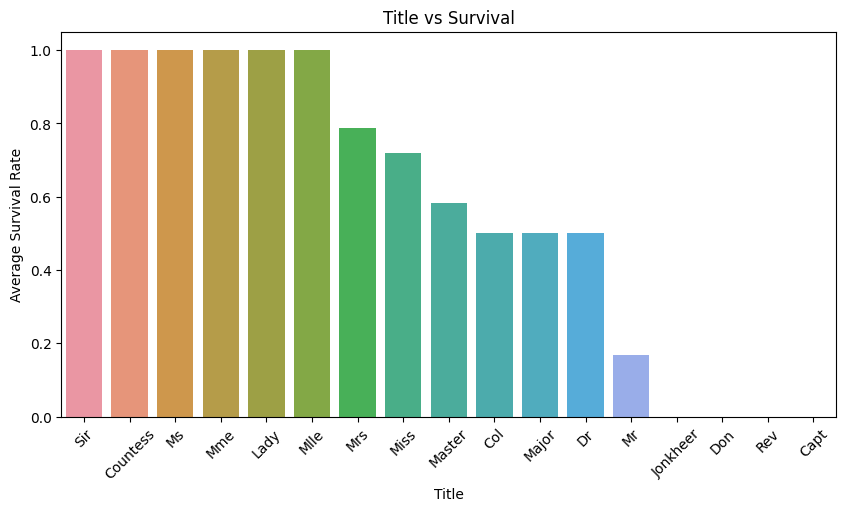

In [240]:
# Create new titles 
titanic_df['Title'] = titles_extracted

# Calculate average survival rate
title_ave_survival_rate = titanic_df.groupby("Title")['Survived'].mean().sort_values(ascending=False)

# Visualize the data
plt.figure(figsize=(10,5))
sns.barplot(x=title_ave_survival_rate.index, y=title_ave_survival_rate.values)
plt.xlabel('Title')
plt.ylabel('Average Survival Rate')
plt.title('Title vs Survival')
plt.xticks(rotation=45)


plt.show()

In [241]:
# Columns to One Hot Encode
columns_to_encode = ['Sex', 'Embarked', 'Title']

# Perform OHE
one_hot_df = pd.get_dummies(titanic_df[columns_to_encode], drop_first=True)

# Drop original column that were one hot encoded
titanic_df = titanic_df.drop(columns=columns_to_encode)

# Concat encoded columns
final_titanic_df = pd.concat([titanic_df, one_hot_df], axis=1)
final_titanic_df = final_titanic_df.drop(['Name','Ticket'], axis=1)
final_titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,22.0,1,0,7.2500,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,...,False,False,False,False,False,True,False,False,False,False


## Model Training

In [242]:
final_titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,22.0,1,0,7.2500,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,...,False,False,False,False,False,True,False,False,False,False


In [245]:
features = final_titanic_df.drop('Survived', axis=1)
labels = final_titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=77)

# Initialize Models

svm = SVC(random_state=77)
dt = DecisionTreeClassifier(random_state=77)
rf = RandomForestClassifier(random_state=77)

models = {'SVM': svm, 'Decision Tree:': dt, 'Random Forest': rf}

print("Metric Scores")
for name, model in models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    b_accuracy_score = balanced_accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    print(f"\n{name}")
    print('-------')
    print("Accuracy:", accuracy)
    print("Balance Accuracy Score", b_accuracy_score)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)




Metric Scores

SVM
-------
Accuracy: 0.6083916083916084
Balance Accuracy Score 0.5572420634920635
Precision: 0.8888888888888888
Recall: 0.12698412698412698
F1 Score: 0.2222222222222222

Decision Tree:
-------
Accuracy: 0.7622377622377622
Balance Accuracy Score 0.7554563492063492
Precision: 0.7457627118644068
Recall: 0.6984126984126984
F1 Score: 0.7213114754098361

Random Forest
-------
Accuracy: 0.8111888111888111
Balance Accuracy Score 0.8025793650793651
Precision: 0.8214285714285714
Recall: 0.7301587301587301
F1 Score: 0.773109243697479
